In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [7]:
df = pd.read_csv('tweet_emotions.csv')
df = df.drop('tweet_id', axis=1)
df = df.rename(columns={'sentiment':'label', 'content':'text'})

df

,label,text
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...
...,...,...
39995,neutral,@JohnLloydTaylor
39996,love,Happy Mothers Day All my love
39997,love,Happy Mother's Day to all the mommies out ther...
39998,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [8]:
emotion_map = {
    'empty': 'neutral',
    'neutral': 'neutral',
    'boredom': 'negative',
    'anger': 'negative',
    'hate': 'negative',
    'sadness': 'negative',
    'worry': 'negative',
    'enthusiasm': 'positive',
    'love': 'positive',
    'happiness': 'positive',
    'relief': 'positive',
    'fun': 'positive',
    'surprise': 'positive'
}

def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

df['text'] = df['text'].apply(preprocess)
df['label'] = df['label'].apply(lambda x: emotion_map[x])

df

,label,text
0,neutral,@user i know i was listenin to bad habit earl...
1,negative,Layin n bed with a headache ughhhh...waitin o...
2,negative,Funeral ceremony...gloomy friday...
3,positive,wants to hang out with friends SOON!
4,neutral,@user We want to trade with someone who has Ho...
...,...,...
39995,neutral,@user
39996,positive,Happy Mothers Day All my love
39997,positive,Happy Mother's Day to all the mommies out ther...
39998,positive,@user WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OU...


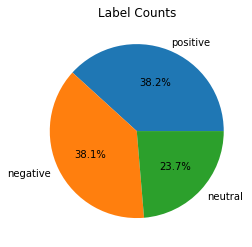

In [14]:
label_counts = df['label'].value_counts()

plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.title('Label Counts')
plt.show()

In [16]:
df['char_length'] = df['text'].apply(lambda x : len(x))

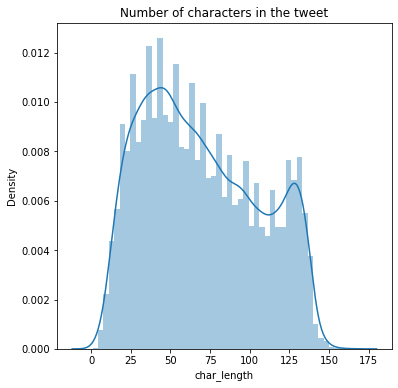

In [22]:
fig, ax1  = plt.subplots(nrows=1, figsize=(6,6))
sns.distplot(df['char_length'], ax=ax1)
ax1.set_title('Number of characters in the tweet')
plt.show()

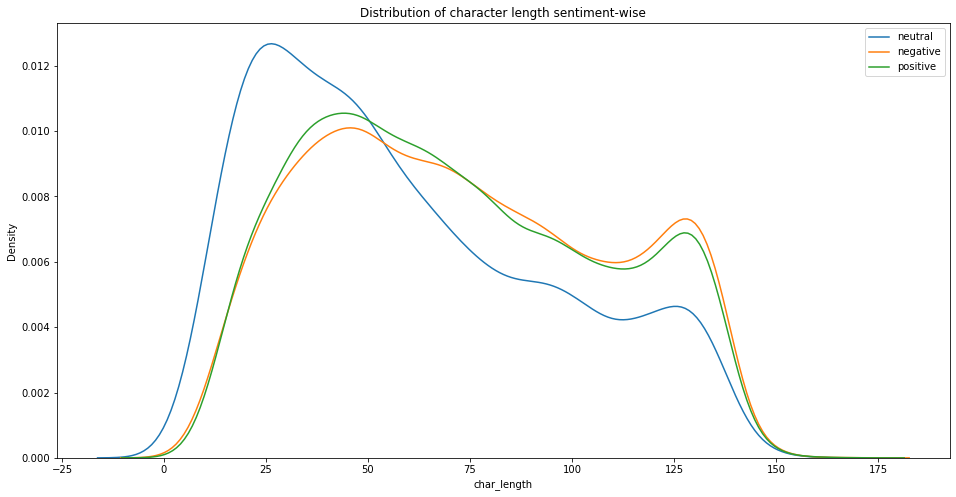

In [23]:
fig, ax = plt.subplots(figsize=(16,8))
for sentiment in df['label'].value_counts().sort_values()[-5:].index.tolist():
    #print(sentiment)
    sns.kdeplot(df[df['label']==sentiment]['char_length'],ax=ax, label=sentiment)
ax.legend()
ax.set_title("Distribution of character length sentiment-wise")
plt.show()